<a href="https://colab.research.google.com/github/PGV1000/data_mining/blob/main/%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%9F%D0%A0_%E2%84%969_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №9. Ансамблевые методы в машинном обучении**

## **Задание №1: Классификация лиц из набора данных Olivetti Faces с помощью алгоритмов градиентного бустинга**

В этом задании мы применим несколько популярных алгоритмов градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoosting из библиотеки scikit-learn для решения задачи классификации лиц из набора данных Olivetti Faces. Цель - определить, какому человеку принадлежит новое изображение лица, на основе обучения на размеченных данных.





Шаги выполнения задания:

1. Загрузите набор данных Olivetti Faces с помощью функции `fetch_olivetti_faces()` из scikit-learn.

2. Разделите данные на обучающую и тестовую выборки с помощью `train_test_split()`.

3. Выполните предобработку изображений:
   - Преобразуйте изображения в вектора признаков (flatten)
   - Нормализуйте значения пикселей (разделите на 255)

4. Создайте и обучите модели градиентного бустинга:
   - CatBoostClassifier
   - LGBMClassifier
   - XGBClassifier
   - GradientBoostingClassifier

5. Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

6. Сравните точность и время обучения разных алгоритмов. Определите, какой из них лучше подходит для данной задачи.

7. Сделайте выводы о сравнительной эффективности разных алгоритмов градиентного бустинга для классификации лиц.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [ ]:
%%capture
!pip install catboost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

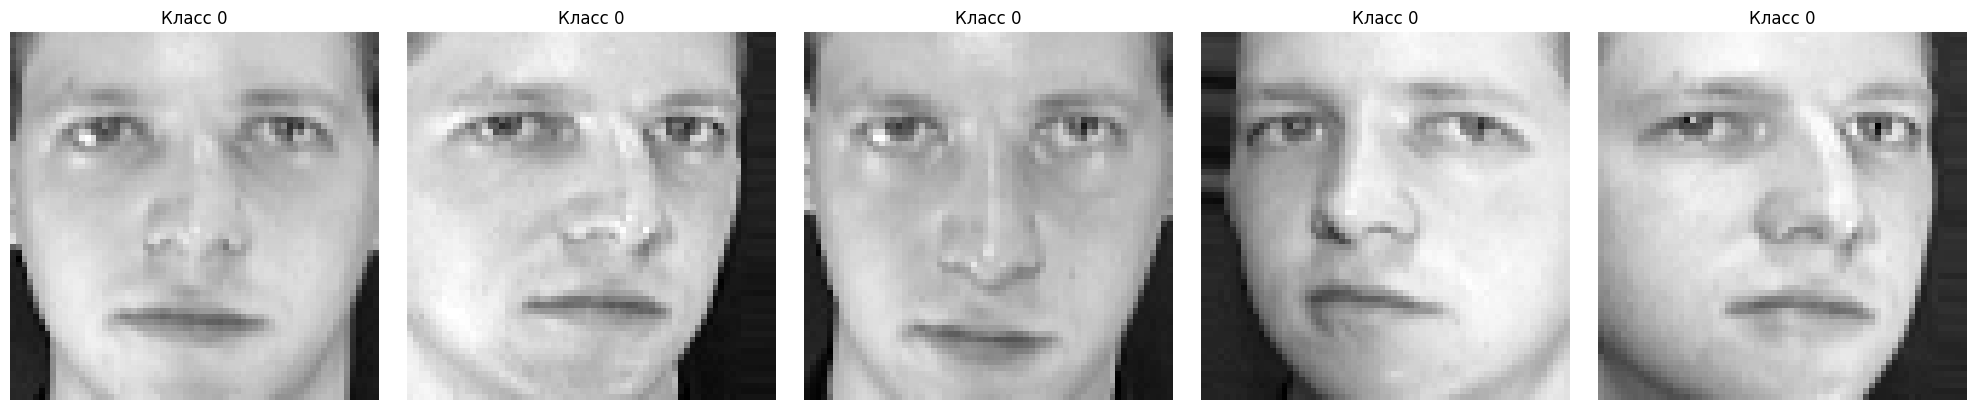

In [ ]:
# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
images = images.reshape(images.shape[0], -1) /255

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((360, 4096), (360,), (40, 4096), (40,))

**Создайте и обучите модели градиентного бустинга:
CatBoostClassifier
LGBMClassifier
XGBClassifier
GradientBoostingClassifier**

In [ ]:
results = {}

CatBoostClassifier

In [ ]:
# Создание и обучение модели
cbc = CatBoostClassifier(
    iterations=50,
    learning_rate=0.1,
    depth=6,
    verbose=0
)
start_time = time.time()
cbc.fit(x_train, y_train)
training_time_cbc = time.time() - start_time

In [ ]:
y_pred_cbc = cbc.predict(x_test)
accuracy_cbc = accuracy_score(y_test, y_pred_cbc)
print(f"Точность CatBoost: {accuracy_cbc:.2f}")
results['CatBoost'] = {'accuracy': accuracy_cbc, 'training_time': training_time_cbc}

Точность CatBoost: 0.80


LGBMClassifier

In [ ]:
%%capture
lgbmc = LGBMClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5
)
start_time = time.time()
lgbmc.fit(x_train, y_train)
training_time_lgbmc = time.time() - start_time

In [ ]:
# Предсказание на тестовых данных
y_pred_lgbmc = lgbmc.predict(x_test)
# Оценка точности
accuracy_lgbmc = accuracy_score(y_test, y_pred_lgbmc)
print(f"Точность модели: {accuracy_lgbmc:.2f}")
results['LGBMC'] = {'accuracy': accuracy_lgbmc, 'training_time': training_time_lgbmc}

Точность модели: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


XGBClassifier

In [ ]:
%%capture
xgbc = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
start_time = time.time()
xgbc.fit(x_train, y_train)
training_time_xgbc = time.time() - start_time

In [ ]:
# Предсказание на тестовых данных
y_pred_xgbc = xgbc.predict(x_test)
# Оценка точности
accuracy_xgbc = accuracy_score(y_test, y_pred_xgbc)
print(f"Точность модели: {accuracy_xgbc:.2f}")
results['XGBC'] = {'accuracy': accuracy_xgbc, 'training_time': training_time_xgbc}

Точность модели: 0.78


GradientBoostingClassifier

In [ ]:
# Создание и обучение модели
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,
                                 max_depth=3, random_state=42)
start_time = time.time()
gbc.fit(x_train, y_train)
training_time_gbc = time.time() - start_time

In [ ]:
# Предсказание на тестовых данных
y_pred_gbc = gbc.predict(x_test)

# Оценка точности
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Точность модели: {accuracy_gbc:.2f}")
results['GBC'] = {'accuracy': accuracy_gbc, 'training_time': training_time_gbc}

Точность модели: 0.68


Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

In [ ]:
print(f'Точность CBC: {accuracy_cbc:.2f}')
print(f'Точность lgbmc: {accuracy_lgbmc:.2f}')
print(f'Точность xgbc: {accuracy_xgbc:.2f}')
print(f'Точность gbc: {accuracy_gbc:.2f}')

Точность CBC: 0.80
Точность lgbmc: 0.75
Точность xgbc: 0.78
Точность gbc: 0.68


In [ ]:
%%capture
cl_rep_cbc = classification_report(y_test, y_pred_cbc)
cl_rep_lgbmc = classification_report(y_test, y_pred_lgbmc)
cl_rep_xgbc = classification_report(y_test, y_pred_xgbc)
cl_rep_gbc = classification_report(y_test, y_pred_gbc)

In [ ]:
print(f'Отчет классификации CBC: \n {cl_rep_cbc}')
print(f'Отчет классификации LGBMC: \n {cl_rep_lgbmc}')
print(f'Отчет классификации XGBC: \n {cl_rep_xgbc}')
print(f'Отчет классификации GBC: \n {cl_rep_gbc}')

Отчет классификации CBC: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         2


In [ ]:
def conf_mat(y_pred_model, title):
  conf_mat =confusion_matrix(y_test, y_pred_model)
  plt.figure(figsize=(10,8))
  sns.heatmap(conf_mat,annot=True,fmt='d')
  plt.title(title)

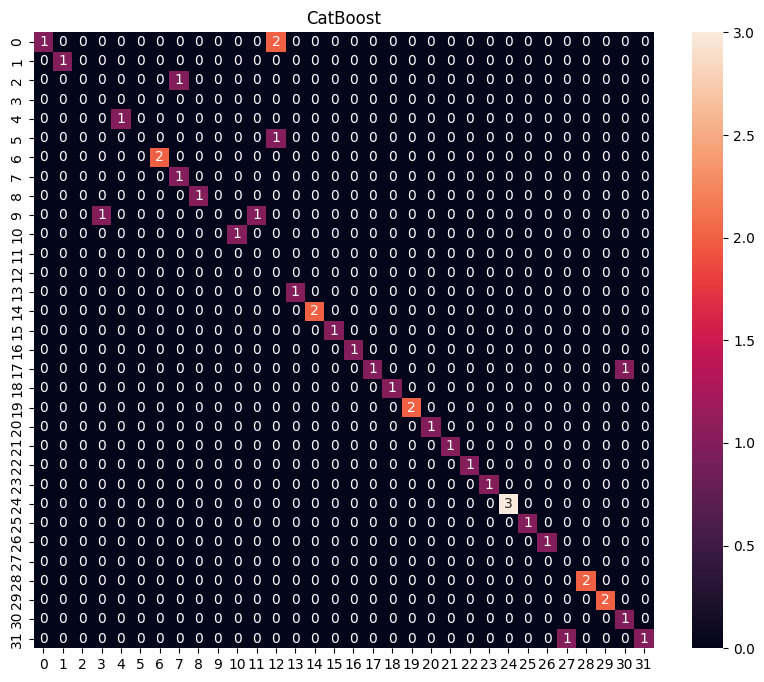

In [ ]:
conf_mat(y_pred_cbc, 'CatBoost')

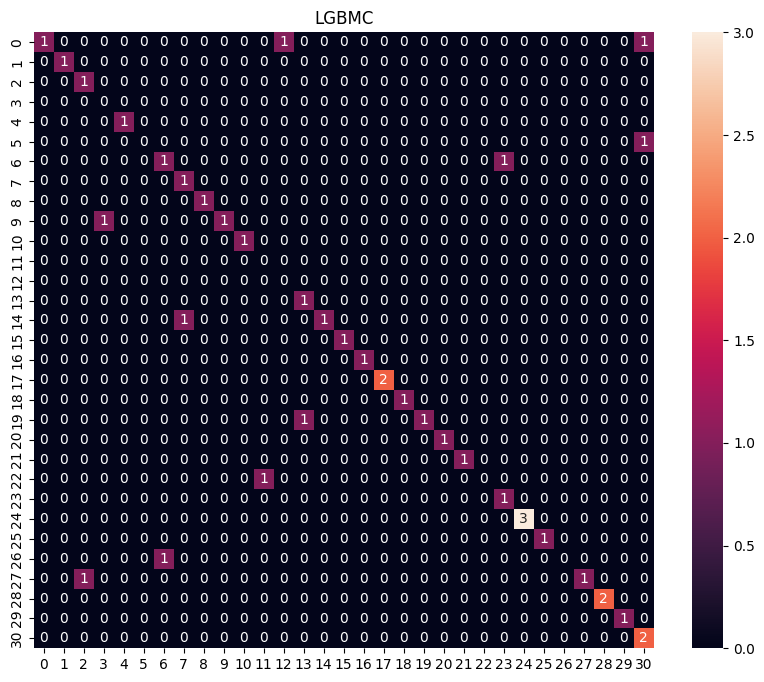

In [ ]:
conf_mat(y_pred_lgbmc, 'LGBMC')

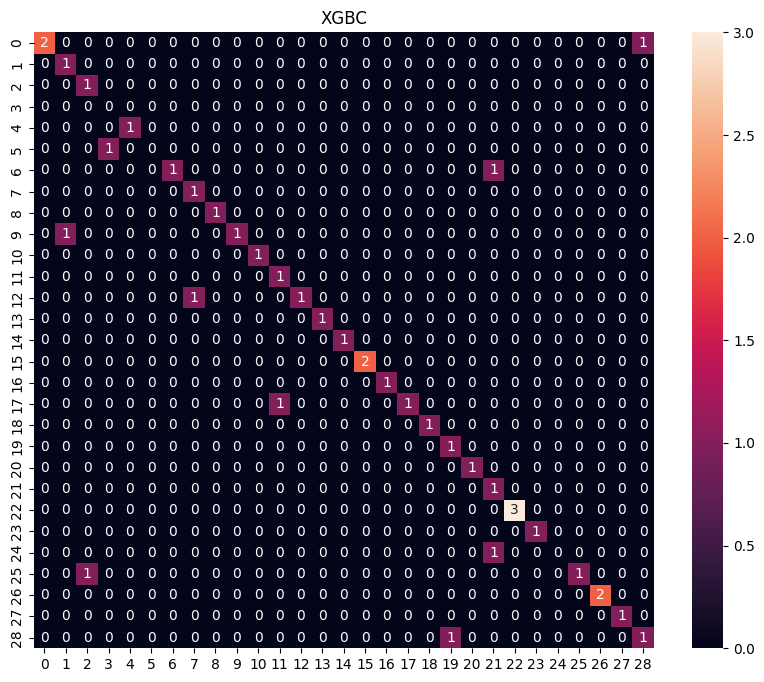

In [ ]:
conf_mat(y_pred_xgbc, 'XGBC')

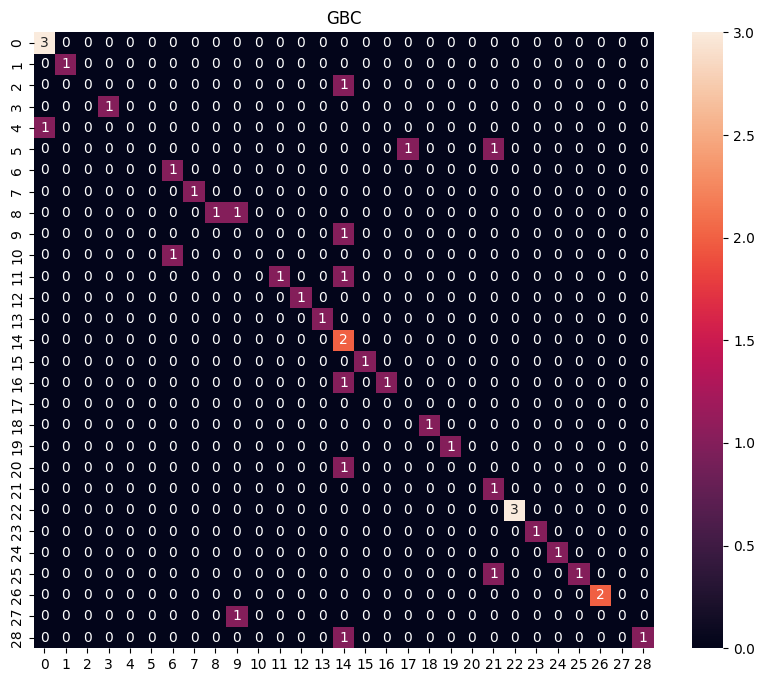

In [ ]:
conf_mat(y_pred_gbc, 'GBC')



Сравните точность и время обучения разных алгоритмов. Определите, какой из них лучше подходит для данной задачи.

Сделайте выводы о сравнительной эффективности разных алгоритмов градиентного бустинга для классификации лиц.

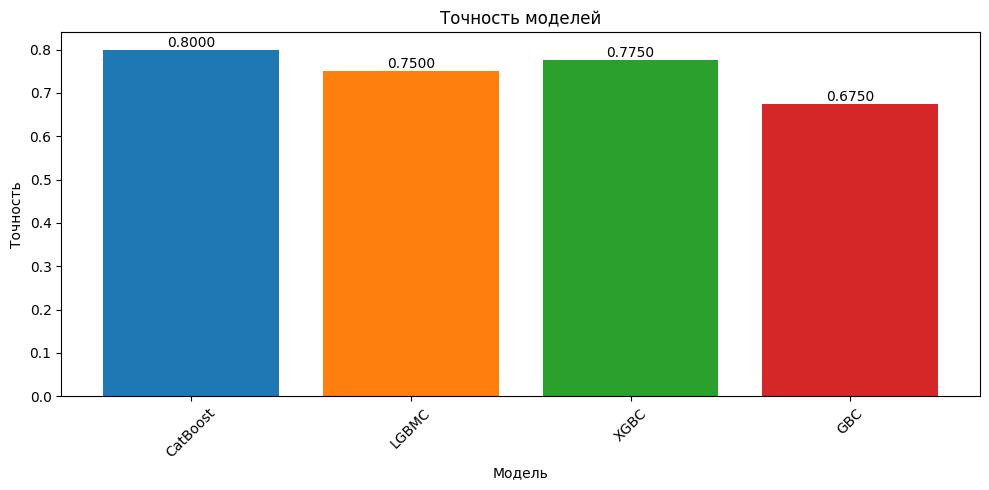

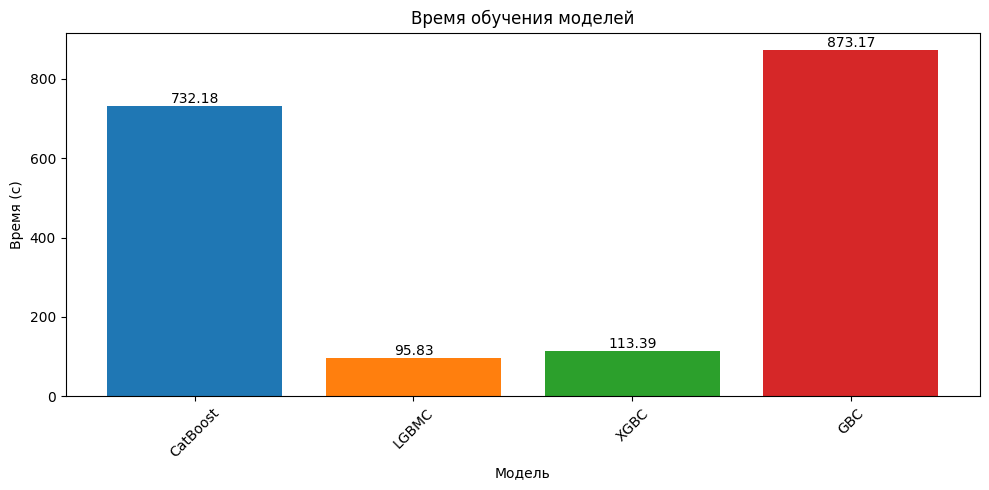

In [ ]:
# Построение графиков
models = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models]
training_times = [results[model]['training_time'] for model in models]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Цвета для столбиков

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracies[i]:.4f}', ha='center', va='bottom')
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}', ha='center', va='bottom')
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (с)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Лучший результат показала модель CatBoost, однако модель XGBC обучилась почти в 7 раз быстрее, при этом не сильно уступила в точности.

## **Задание №2: Предсказание нижней половины лица по верхней с помощью алгоритмов градиентного бустинга**




- В этом задании мы применим алгоритмы градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoostingRegressor - для решения интересной задачи регрессии на датасете лиц Olivetti Faces. Цель - предсказать значения пикселей нижней половины лица по пикселям верхней половины.

- Каждое изображение лица представляет собой матрицу 64x64 в оттенках серого. Мы разделим изображения на верхнюю и нижнюю половины и будем предсказывать значения яркости пикселей нижней половины по значениям верхней.

- Сравним качество (по метрике R^2) и время обучения разных реализаций градиентного бустинга на этой задаче восстановления изображений. Посмотрим, насколько хорошо алгоритмы бустинга смогут достроить нижнюю часть лица по верхней.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [ ]:
%%capture
!pip install catboost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import time
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
60


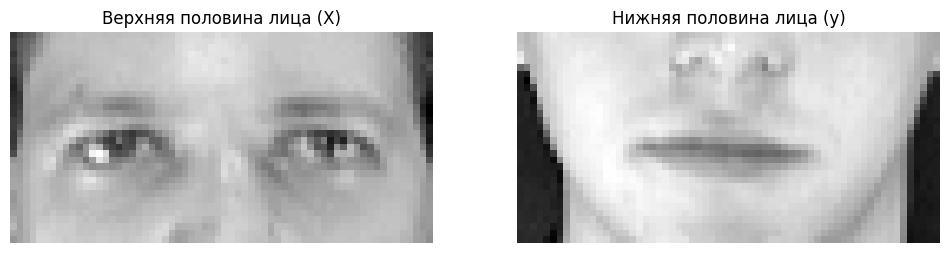

In [ ]:
# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images[:60]  # Изображения размером 64x64
n_samples = images.shape[0]
print(n_samples)

# Разделение изображений на верхнюю и нижнюю половины
upper_half = images[:, :32, :]  # Верхняя половина (первые 32 строки)
lower_half = images[:, 32:, :]  # Нижняя половина (последние 32 строки)

# Преобразование 2D изображений в 1D векторы
x = upper_half.reshape((n_samples, -1))
y = lower_half.reshape((n_samples, -1))

# Выбор одного примера для отображения
sample_index = 0  # Измените значение для выбора другого изображения

# Восстановление изображений из векторов
upper_face = x[sample_index].reshape(32, 64)
lower_face = y[sample_index].reshape(32, 64)

# Отображение верхней и нижней половин лица
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(upper_face, cmap='gray')
axes[0].set_title('Верхняя половина лица (X)')
axes[0].axis('off')

axes[1].imshow(lower_face, cmap='gray')
axes[1].set_title('Нижняя половина лица (y)')
axes[1].axis('off')

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48, 2048), (48, 2048), (12, 2048), (12, 2048))

In [ ]:
results = {}

CatBoostRegressor

In [ ]:
start_time = time.time()
cbr = MultiOutputRegressor(CatBoostRegressor(iterations=20,
                                                  learning_rate=0.1,
                                                  depth=3,
                                                  verbose=0))
cbr.fit(x_train, y_train)
training_time_cbr = time.time() - start_time

In [ ]:
y_pred_cbr = cbr.predict(x_test)
r2_cbr = r2_score(y_test, y_pred_cbr)
results['CatBoostRegressor'] = {'R^2': r2_cbr, 'training_time': training_time_cbr}

LGMRegressor

In [ ]:
%%capture
start_time = time.time()
lgbmr = MultiOutputRegressor(LGBMRegressor(iterations=20,
                                                  learning_rate=0.1,
                                                  depth=3,
                                                  verbose=0))
lgbmr.fit(x_train, y_train)
training_time_lgbmr = time.time() - start_time

In [ ]:
y_pred_lgbmr = cbr.predict(x_test)
r2_lgbmr = r2_score(y_test, y_pred_lgbmr)
results['LGBMR'] = {'R^2': r2_lgbmr, 'training_time': training_time_lgbmr}

XGBRegressor

In [ ]:
%%capture
start_time = time.time()
xgbr = MultiOutputRegressor(XGBRegressor(iterations=20,
                                                  learning_rate=0.1,
                                                  depth=3,
                                                  verbose=0))
xgbr.fit(x_train, y_train)
training_time_xgbr = time.time() - start_time

In [ ]:
y_pred_xgbr = xgbr.predict(x_test)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
results['XGBR'] = {'R^2': r2_xgbr, 'training_time': training_time_xgbr}

GBRegressor

In [ ]:
%%capture
start_time = time.time()
gbr = MultiOutputRegressor(CatBoostRegressor(iterations=20,
                                                  learning_rate=0.1,
                                                  depth=3,
                                                  verbose=0))
gbr.fit(x_train, y_train)
training_time_gbr = time.time() - start_time

In [ ]:
y_pred_gbr = cbr.predict(x_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
results['GBR'] = {'R^2': r2_gbr, 'training_time': training_time_gbr}

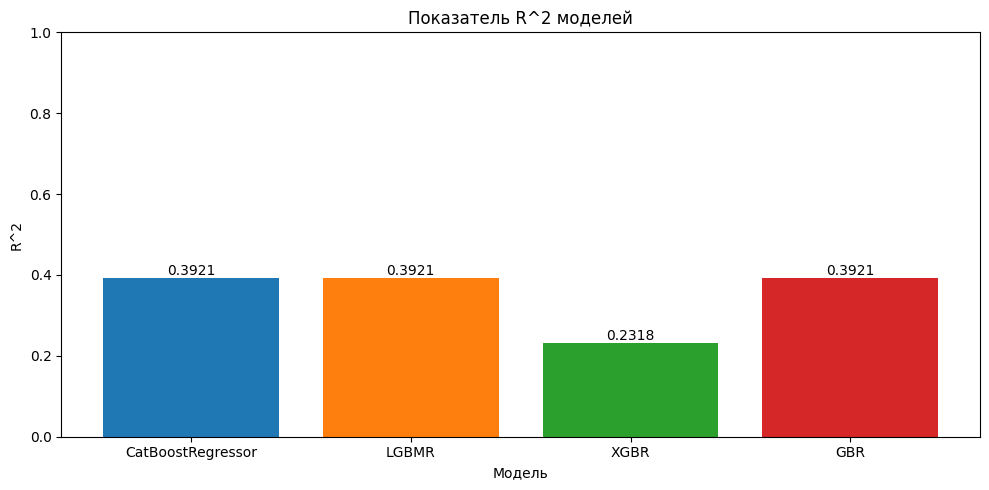

In [ ]:
models = list(results.keys())
r2_scores = [results[model]['R^2'] for model in models]
training_times = [results[model]['training_time'] for model in models]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2_scores[i]:.4f}', ha='center', va='bottom')
plt.title('Показатель R^2 моделей')
plt.xlabel('Модель')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

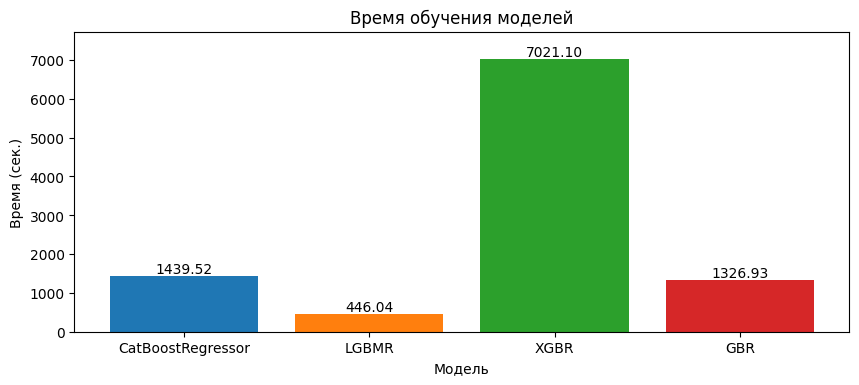

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (cек.)')
plt.ylim(0, max(training_times) * 1.1)
plt.subplots_adjust(bottom=0.2, top=0.8)
plt.show()

## **Задание №3: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов VotingClassifier**



- В этом задании мы применим ансамблевый метод классификации VotingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. VotingClassifier объединяет предсказания нескольких базовых классификаторов путем голосования, что позволяет улучшить качество классификации по сравнению с отдельными моделями

- Мы будем использовать несколько "слабых" классификаторов, таких как LogisticRegression, DecisionTreeClassifier и KNeighborsClassifier, NaiveBayes и объединим их в ансамбль с помощью VotingClassifier. Затем сравним точность ансамбля с отдельными базовыми моделями и оценим эффект от их комбинирования.



- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


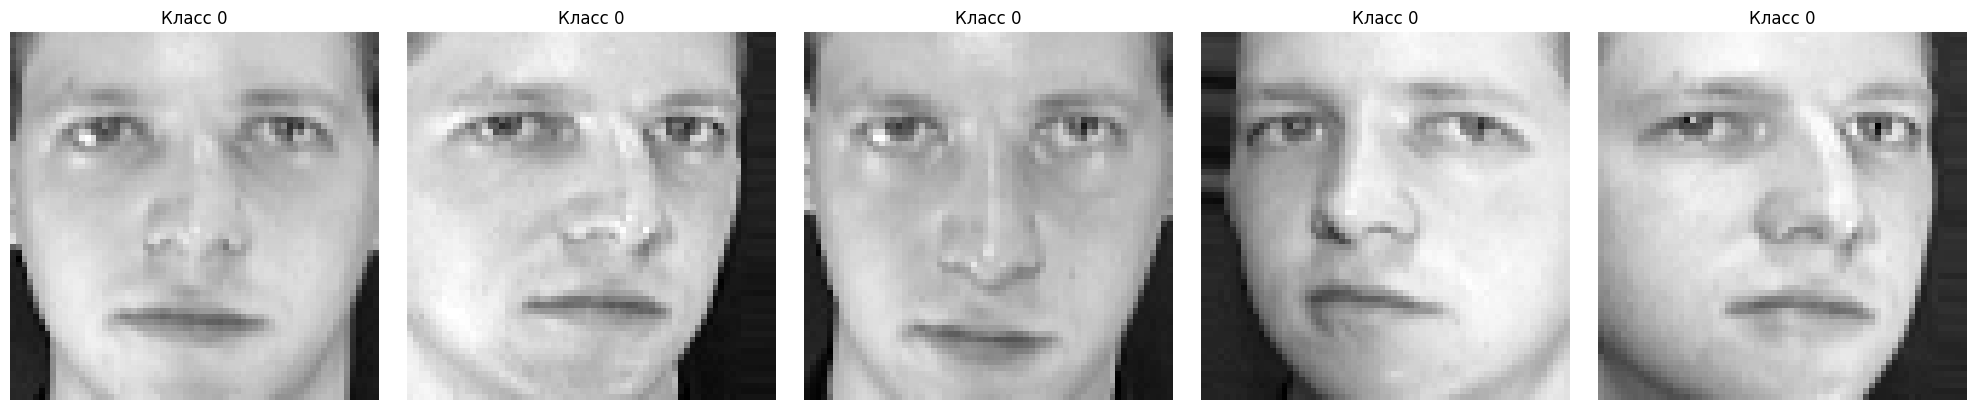

In [3]:
# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
images = images.reshape(images.shape[0], -1) /255

In [43]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 4096), (320,), (80, 4096), (80,))

In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
results = {}

LogisticRegression

In [46]:
%%capture
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(x_train, y_train)

In [47]:
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = accuracy_lr

DecisionTreeClassifier

In [48]:
%%capture
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)

In [49]:
y_pred_dtc = dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
results['Decision Tree Classifier'] = accuracy_dtc

KNeighborsClassifier

In [50]:
%%capture
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

In [51]:
y_pred_knc = knc.predict(x_test)
accuracy_knc = accuracy_score(y_test, y_pred_knc)
results['K-Neighbors Classifier'] = accuracy_knc

GaussianNB

In [52]:
%%capture
gnb = GaussianNB()
gnb.fit(x_train, y_train)

In [53]:
y_pred_gnb = gnb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
results['GaussianNB'] = accuracy_gnb

VotingClassifier

In [54]:
%%capture
vc = VotingClassifier(
    estimators=[('lr', lr), ('dtc', dtc), ('knc', knc), ('gnb', gnb)],
    voting='soft'
)
vc.fit(x_train, y_train)

In [55]:
y_pred_vc = vc.predict(x_test)
accuracy_vc = accuracy_score(y_test, y_pred_vc)
results['Voting Classifier'] = accuracy_vc

In [56]:
results

{'Logistic Regression': 0.95,
 'Decision Tree Classifier': 0.5375,
 'K-Neighbors Classifier': 0.7875,
 'GaussianNB': 0.8625,
 'Voting Classifier': 0.925}

[0.95, 0.5375, 0.7875, 0.8625, 0.925]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree Classifier'),
  Text(2, 0, 'K-Neighbors Classifier'),
  Text(3, 0, 'GaussianNB'),
  Text(4, 0, 'Voting Classifier')])

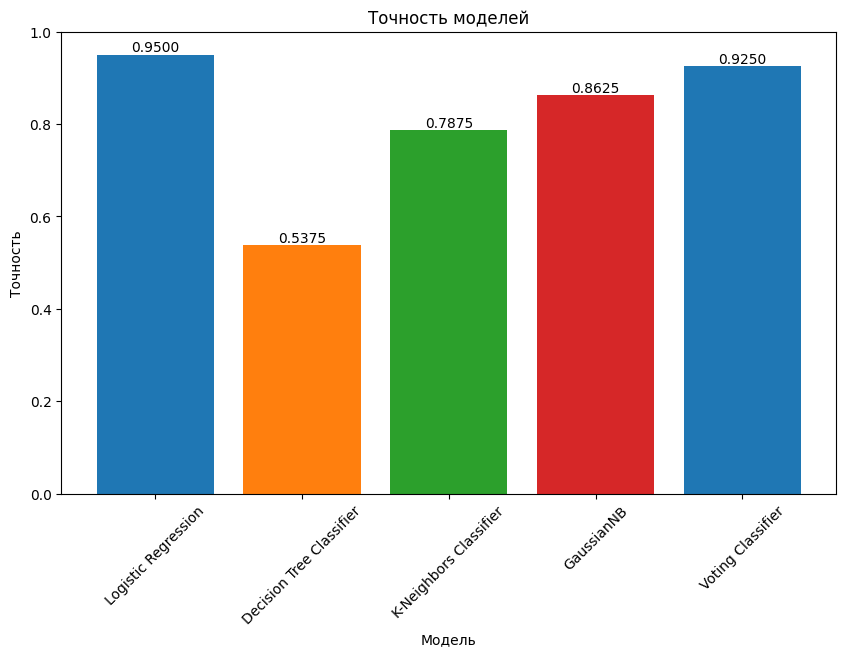

In [68]:
accuracy_values = list(results.values())
models_names= list(results.keys())
plt.figure(figsize=(10, 6))
bars = plt.bar(models_names, accuracy_values, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy_values[i]:.4f}', ha='center', va='bottom')
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.xticks(rotation=45)

In [69]:
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
conf_mat_dtc = confusion_matrix(y_test, y_pred_dtc)
conf_mat_knc = confusion_matrix(y_test, y_pred_knc)
conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
conf_mat_vc = confusion_matrix(y_test, y_pred_vc)

Text(0.5, 1.0, 'Logistic Regression')

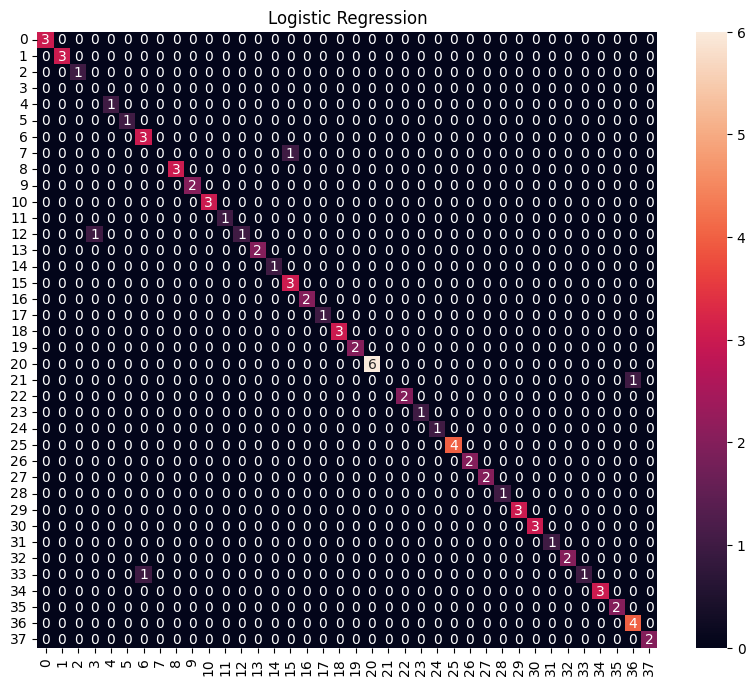

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_lr,annot=True,fmt='d')
plt.title('Logistic Regression')

<Axes: title={'center': 'Decision Tree Classifier'}>

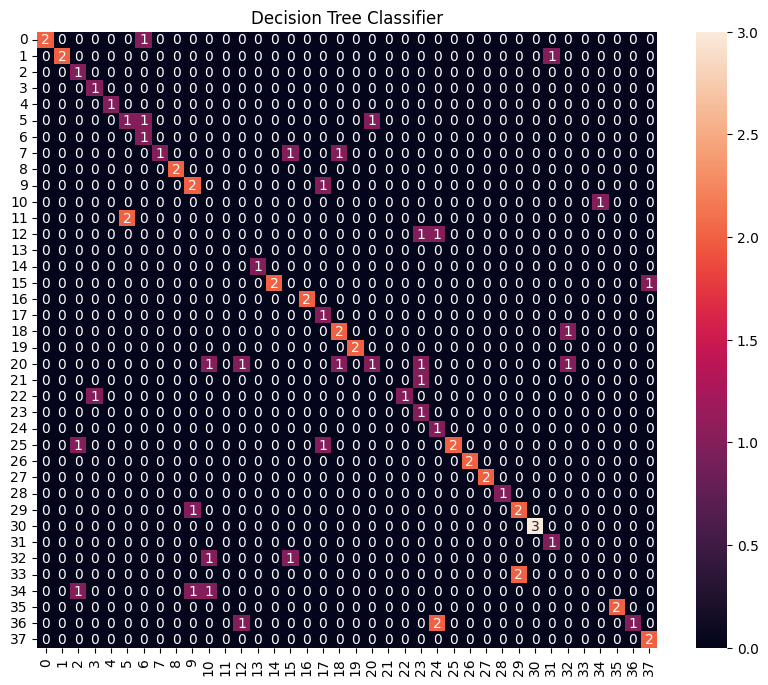

In [72]:
plt.figure(figsize=(10,8))
plt.title('Decision Tree Classifier')
sns.heatmap(conf_mat_dtc, annot=True, fmt='d')

<Axes: title={'center': 'K-Neighbors Classifier'}>

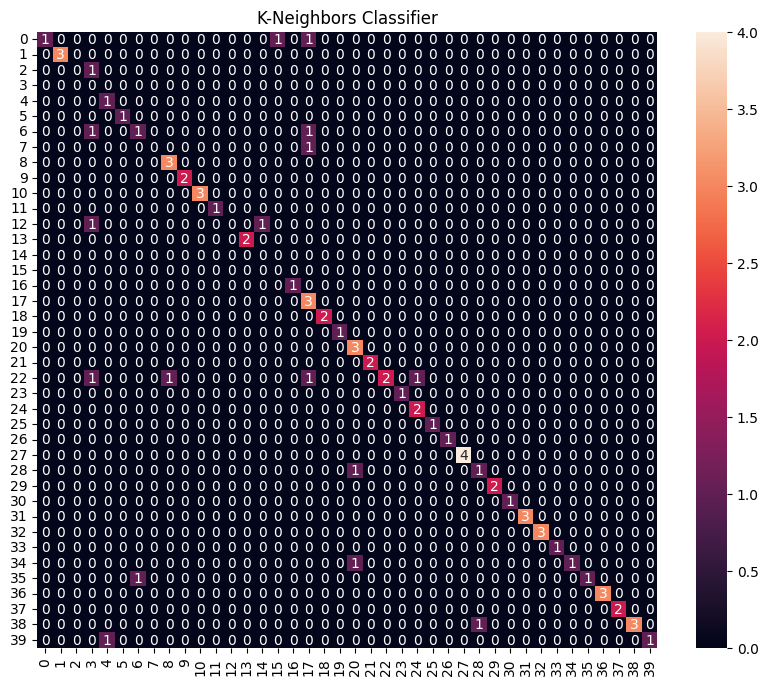

In [73]:
plt.figure(figsize=(10,8))
plt.title('K-Neighbors Classifier')
sns.heatmap(conf_mat_knc, annot=True, fmt='d')

<Axes: title={'center': 'GaussianNB'}>

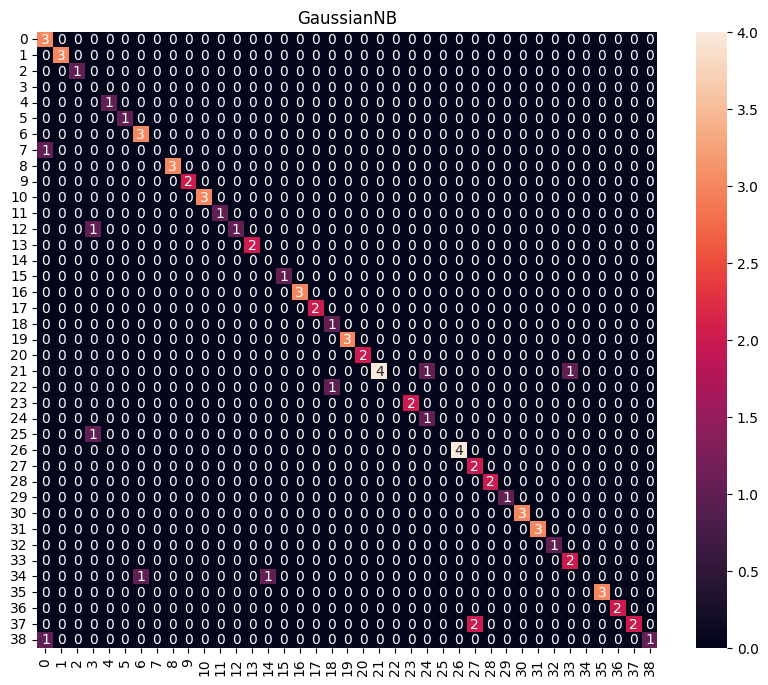

In [75]:
plt.figure(figsize=(10,8))
plt.title('GaussianNB')
sns.heatmap(conf_mat_gnb, annot=True, fmt='d')

<Axes: title={'center': 'Voting Classifier'}>

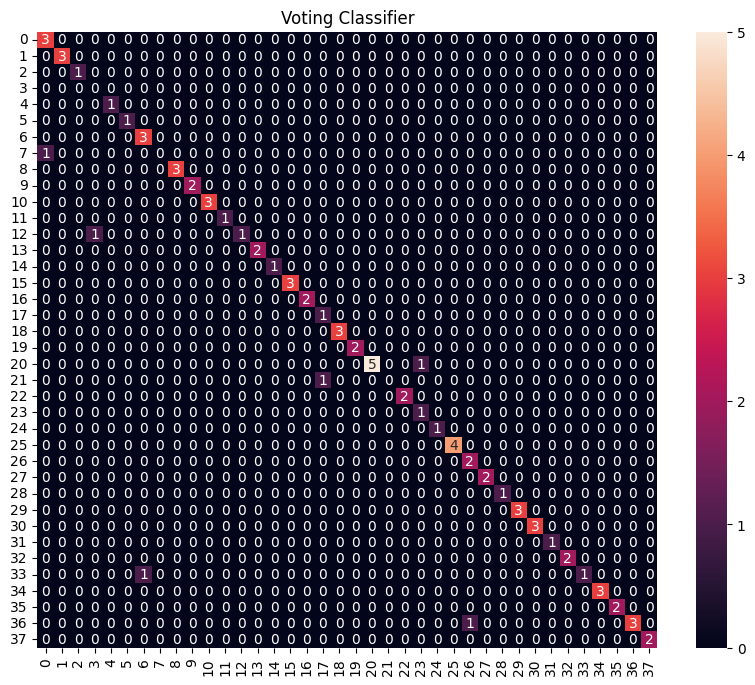

In [76]:
plt.figure(figsize=(10,8))
plt.title('Voting Classifier')
sns.heatmap(conf_mat_vc, annot=True, fmt='d')

In [78]:
report_lr = classification_report(y_test, y_pred_lr)
report_dtc = classification_report(y_test, y_pred_dtc)
report_knc = classification_report(y_test, y_pred_knc)
report_gnb = classification_report(y_test, y_pred_gnb)
report_vc = classification_report(y_test, y_pred_vc)
for model_name, report in zip(['Logistic Regression', 'Decision Tree Classifier', 'K-Neighbors Classifier', 'GaussianNB', 'Voting Classifier'],
                              [report_lr, report_dtc, report_knc, report_gnb, report_vc]):
    print(f'Отчет классификации {model_name}:\n{report}\n')

Отчет классификации Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## **Задание №4: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов** [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)



- В этом задании мы применим ансамблевый метод классификации StackingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. StackingClassifier объединяет предсказания нескольких базовых классификаторов путем обучения метаклассификатора на их выходах, что позволяет улучшить качество классификации по сравнению с отдельными моделями и методом голосования VotingClassifier.


- Мы будем использовать несколько "слабых" классификаторов первого уровня, таких как LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и GaussianNB. Затем мы обучим метаклассификатор второго уровня (например, LogisticRegression или SVC) на выходах классификаторов первого уровня. Метаклассификатор будет учиться комбинировать предсказания базовых моделей оптимальным образом.




- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

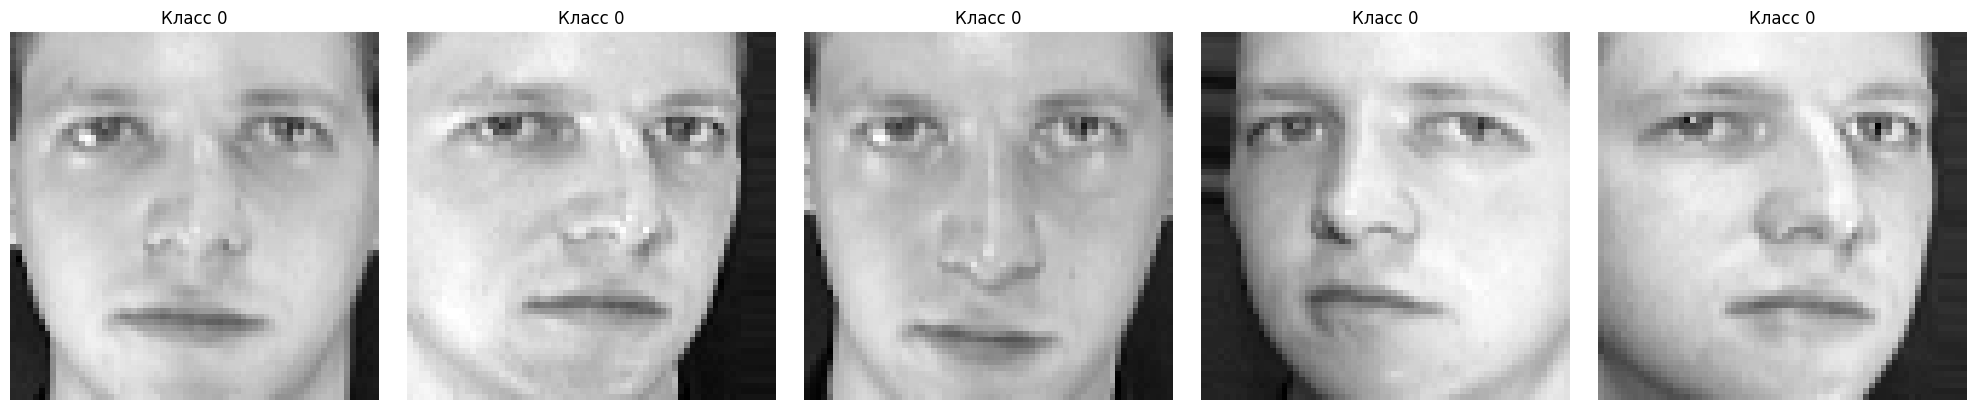

In [81]:
# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [82]:
images = images.reshape(images.shape[0], -1) /255

In [83]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 4096), (320,), (80, 4096), (80,))

In [84]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [100]:
results = {}

LogisticRegression

In [101]:
%%capture
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(x_train, y_train)

In [102]:
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = accuracy_lr

DecisionTreeClassifier

In [103]:
%%capture
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)

In [104]:
y_pred_dtc = dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
results['Decision Tree Classifier'] = accuracy_dtc

KNeighborsClassifier

In [105]:
%%capture
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

In [106]:
y_pred_knc = knc.predict(x_test)
accuracy_knc = accuracy_score(y_test, y_pred_knc)
results['K-Neighbors Classifier'] = accuracy_knc

GaussianNB

In [107]:
%%capture
gnb = GaussianNB()
gnb.fit(x_train, y_train)

In [108]:
y_pred_gnb = gnb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
results['GaussianNB'] = accuracy_gnb

VotingClassifier

In [109]:
%%capture
sc = StackingClassifier(
    estimators=[('lr', lr), ('dtc', dtc), ('knc', knc), ('gnb', gnb)],
)
sc.fit(x_train, y_train)

In [110]:
y_pred_sc = vc.predict(x_test)
accuracy_sc = accuracy_score(y_test, y_pred_sc)
results['Stacking Classifier'] = accuracy_sc

In [111]:
results

{'Logistic Regression': 0.95,
 'Decision Tree Classifier': 0.5375,
 'K-Neighbors Classifier': 0.7875,
 'GaussianNB': 0.8625,
 'Stacking Classifier': 0.925}

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree Classifier'),
  Text(2, 0, 'K-Neighbors Classifier'),
  Text(3, 0, 'GaussianNB'),
  Text(4, 0, 'Stacking Classifier')])

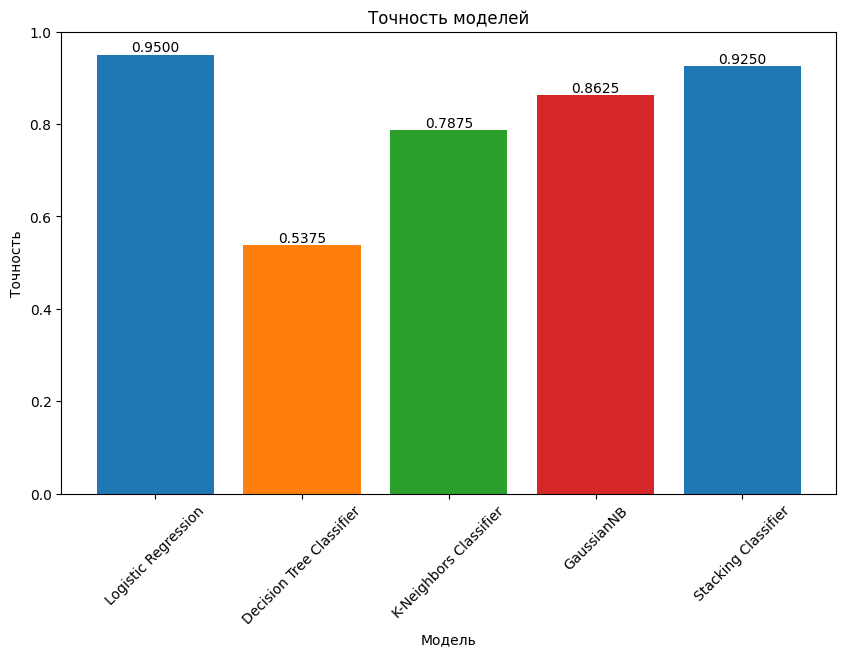

In [112]:
accuracy_values = list(results.values())
models_names= list(results.keys())
plt.figure(figsize=(10, 6))
bars = plt.bar(models_names, accuracy_values, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy_values[i]:.4f}', ha='center', va='bottom')
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.xticks(rotation=45)

In [113]:
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
conf_mat_dtc = confusion_matrix(y_test, y_pred_dtc)
conf_mat_knc = confusion_matrix(y_test, y_pred_knc)
conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
conf_mat_sc = confusion_matrix(y_test, y_pred_sc)

Text(0.5, 1.0, 'Logistic Regression')

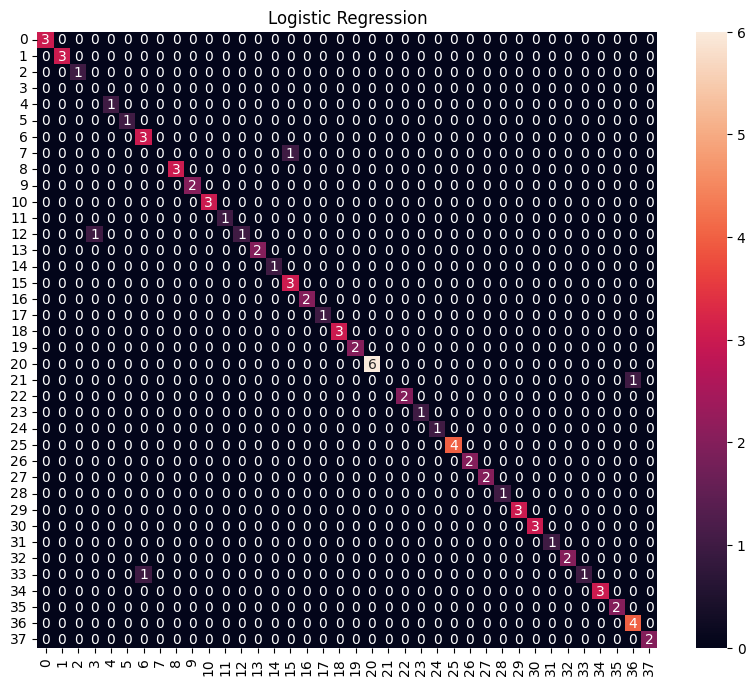

In [114]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_lr,annot=True,fmt='d')
plt.title('Logistic Regression')

<Axes: title={'center': 'Decision Tree Classifier'}>

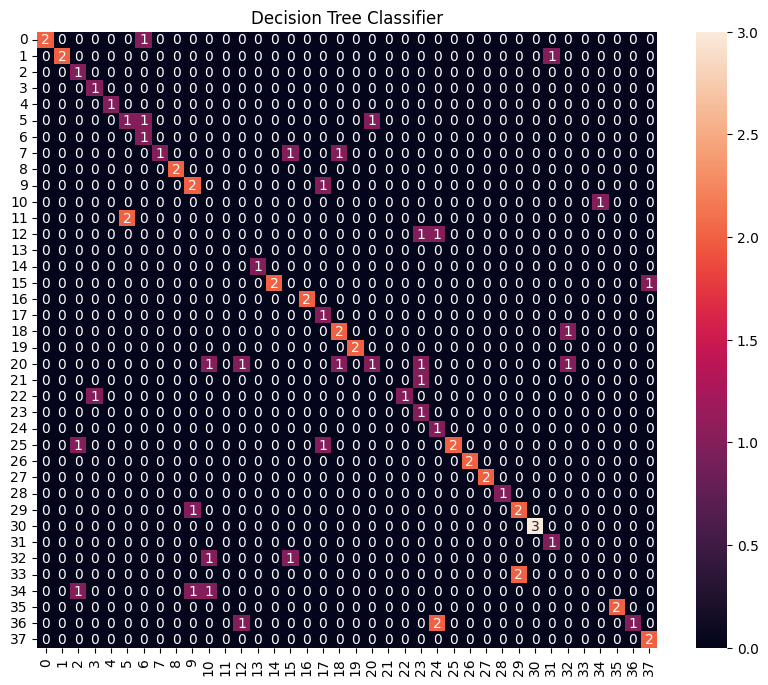

In [115]:
plt.figure(figsize=(10,8))
plt.title('Decision Tree Classifier')
sns.heatmap(conf_mat_dtc, annot=True, fmt='d')

<Axes: title={'center': 'K-Neighbors Classifier'}>

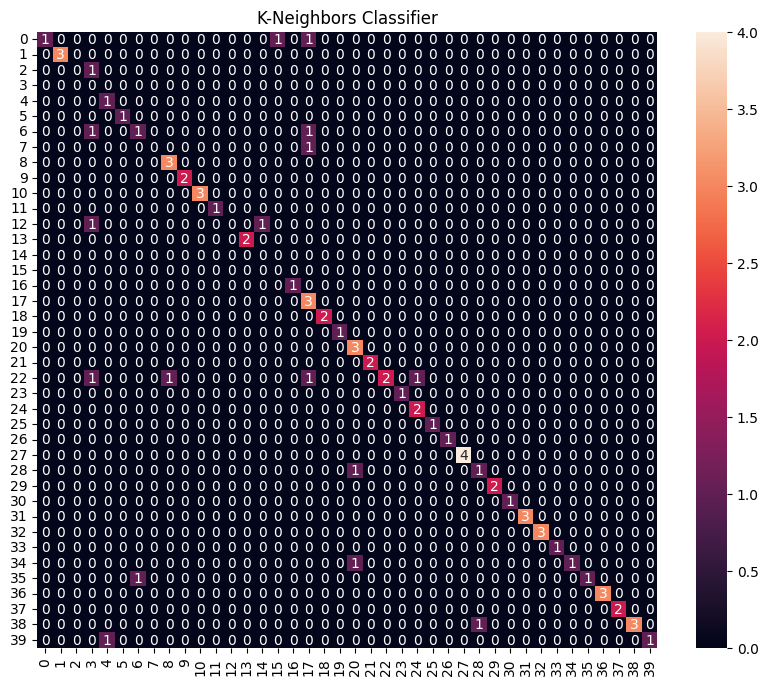

In [116]:
plt.figure(figsize=(10,8))
plt.title('K-Neighbors Classifier')
sns.heatmap(conf_mat_knc, annot=True, fmt='d')

<Axes: title={'center': 'GaussianNB'}>

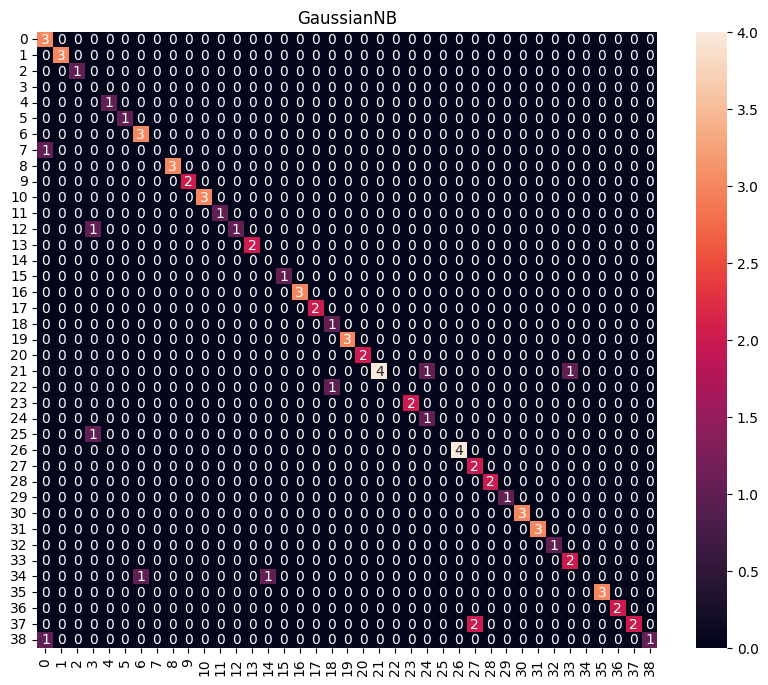

In [117]:
plt.figure(figsize=(10,8))
plt.title('GaussianNB')
sns.heatmap(conf_mat_gnb, annot=True, fmt='d')

<Axes: title={'center': 'Stacking Classifier'}>

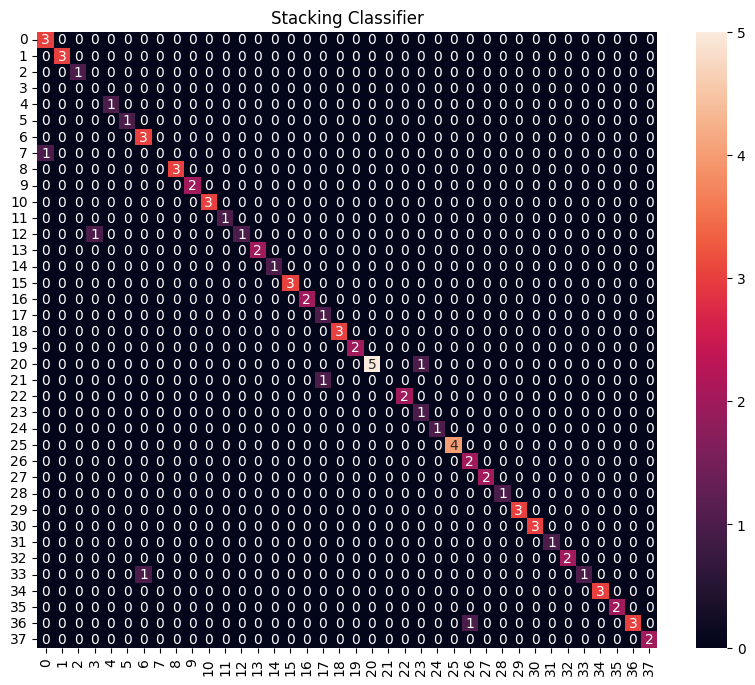

In [118]:
plt.figure(figsize=(10,8))
plt.title('Stacking Classifier')
sns.heatmap(conf_mat_sc, annot=True, fmt='d')

In [119]:
report_lr = classification_report(y_test, y_pred_lr)
report_dtc = classification_report(y_test, y_pred_dtc)
report_knc = classification_report(y_test, y_pred_knc)
report_gnb = classification_report(y_test, y_pred_gnb)
report_sc = classification_report(y_test, y_pred_sc)
for model_name, report in zip(['Logistic Regression', 'Decision Tree Classifier', 'K-Neighbors Classifier', 'GaussianNB', 'Stacking Classifier'],
                              [report_lr, report_dtc, report_knc, report_gnb, report_sc]):
    print(f'Отчет классификации {model_name}:\n{report}\n')

Отчет классификации Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_